In [ ]:
# Import Tensorflow & Pathlib librairies
import tensorflow as tf
import pathlib
import pandas as pd
import numpy as np
import os
import io
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


In [ ]:
# Import dataset with Pandas
dataset = pd.read_csv("https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Deep+Learning/project/spam.csv", encoding="ISO 8859-1")
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# Basic stats
print("Shape : {}".format(dataset.shape))
print()

print("Display of dataset: ")
display(dataset.head())
print()

print("Basics statistics: ")
data_desc = dataset.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

Shape : (5572, 5)

Display of dataset: 


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN



Basics statistics: 


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2



Percentage of missing values: 


v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

In [ ]:
# Let's take the columns we're interested in
dataset = dataset[["v1", "v2"]]
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#proportion de spam dans le dataset
occur = dataset.groupby(['v1']).size()

# display occurrences of a particular column
display(occur)

v1
ham     4825
spam     747
dtype: int64

In [ ]:
dataset['v1'].value_counts(normalize=True) * 100


ham     86.593683
spam    13.406317
Name: v1, dtype: float64

In [ ]:
# We start by downloading spacy for the english language
!python -m spacy download en_core_web_sm -q

2023-08-07 18:14:59.920299: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 79.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
# Import Stop words
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
# Remove all non alphanumeric characters except whitespaces
dataset["v2_clean"] = dataset["v2"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" "))
# remove double spaces and spaces at the beginning and end of strings
dataset["v2_clean"] = dataset["v2_clean"].apply(lambda x: x.replace(" +"," ").lower().strip())
# remove stop words and replace everyword with their lemma
dataset["v2_clean"] = dataset["v2_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) & (token.text not in STOP_WORDS)]))

In [ ]:
dataset.head()

,v1,v2,v2_clean
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think usf live


In [ ]:
dataset["v1"] = dataset["v1"].astype('category')
dataset.dtypes

v1          category
v2            object
v2_clean      object
dtype: object

In [ ]:
dataset["label"] = dataset["v1"].cat.codes
dataset.head()

,v1,v2,v2_clean,label
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...,0
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,1
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think usf live,0


In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000, oov_token="out_of_vocab") # instanciate the tokenizer
tokenizer.fit_on_texts(dataset.v2_clean)
dataset["v2_encoded"] = tokenizer.texts_to_sequences(dataset.v2_clean)

dataset["len_text"] = dataset["v2_encoded"].apply(lambda x: len(x))
dataset = dataset[dataset["len_text"]!=0]

In [ ]:
dataset.head()

,v1,v2,v2_clean,label,v2_encoded,len_text
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...,0,"[1, 230, 447, 463, 942, 36, 52, 204, 943, 79, ...",14
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,0,"[10, 195, 464, 289, 2, 1]",6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,1,"[13, 299, 4, 533, 664, 34, 1, 851, 423, 1, 1, ...",22
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c,0,"[2, 125, 150, 1, 2, 85]",6
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think usf live,0,"[709, 23, 665, 129]",4


In [ ]:
v2_pad = tf.keras.preprocessing.sequence.pad_sequences(dataset.v2_encoded, padding="post")


In [ ]:
# Train Test Split
xtrain, xval, ytrain, yval = train_test_split(v2_pad,dataset.label, test_size=0.3)

In [ ]:
# We'll use this to form a tensorflow dataset containing on the one hand
# the encoded texts and the labels.
train = tf.data.Dataset.from_tensor_slices((xtrain, ytrain))
val = tf.data.Dataset.from_tensor_slices((xval, yval))

# We then organize the dataste per batch
train_batch = train.shuffle(len(train)).batch(1024)
val_batch = val.shuffle(len(val)).batch(1024)

In [ ]:
 # Regardons un batch
for v2_encoded, label in train_batch.take(1):
  print(v2_encoded, label)


tf.Tensor(
[[262  28 233 ...   0   0   0]
 [  6 508  55 ...   0   0   0]
 [ 29 378 158 ...   0   0   0]
 ...
 [ 81 186  53 ...   0   0   0]
 [  1   1   1 ...   0   0   0]
 [127  15 569 ...   0   0   0]], shape=(1024, 72), dtype=int32) tf.Tensor([0 0 1 ... 0 0 0], shape=(1024,), dtype=int8)


In [ ]:
#Building our model
embedding_dim=16 # the dimensionality of the representation space

vocab_size = tokenizer.num_words # the number of words in the vocabulary
model = Sequential([
  Embedding(vocab_size+1, embedding_dim, name="embedding"), # the embedding layer
  # the input dim needs to be equal to the size of the vocabulary + 1 (because of
  # the zero padding)
  GlobalAveragePooling1D(), # this will pick the average for every word in the sentence
  # along each dimension of the representation space.
  Dense(32, activation='relu'), # a dense layer
  Dense(1, activation="sigmoid") # the prediction layer
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          16016     
                                                                 
 global_average_pooling1d_3   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 32)                544       
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 16,593
Trainable params: 16,593
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs2")

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_batch,
    validation_data=val_batch,
    epochs=100,
    callbacks=[tensorboard_callback])

Epoch 1/100
4/4 [==============================] - 1s 57ms/step - loss: 0.6913 - accuracy: 0.6695 - val_loss: 0.6871 - val_accuracy: 0.8710
Epoch 2/100
4/4 [==============================] - 0s 17ms/step - loss: 0.6849 - accuracy: 0.8632 - val_loss: 0.6802 - val_accuracy: 0.8710
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 0.6777 - accuracy: 0.8632 - val_loss: 0.6722 - val_accuracy: 0.8710
Epoch 4/100
4/4 [==============================] - 0s 18ms/step - loss: 0.6694 - accuracy: 0.8632 - val_loss: 0.6629 - val_accuracy: 0.8710
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 0.6601 - accuracy: 0.8632 - val_loss: 0.6530 - val_accuracy: 0.8710
Epoch 6/100
4/4 [==============================] - 0s 20ms/step - loss: 0.6503 - accuracy: 0.8632 - val_loss: 0.6426 - val_accuracy: 0.8710
Epoch 7/100
4/4 [==============================] - 0s 17ms/step - loss: 0.6399 - accuracy: 0.8632 - val_loss: 0.6317 - val_accuracy: 0.8710
Epoch 8/100
4/4 [===

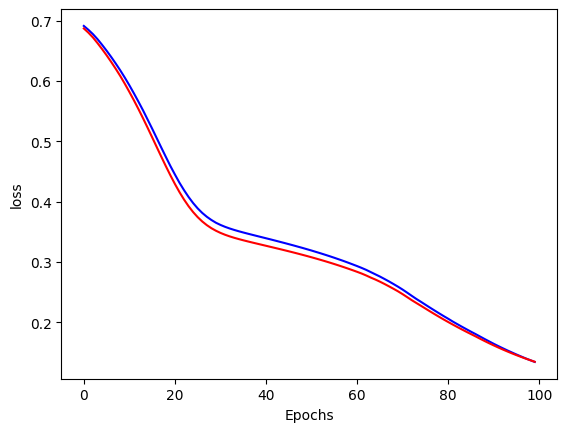

In [ ]:
import matplotlib.pyplot as plt

# Visualization of the training process on the loss function
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

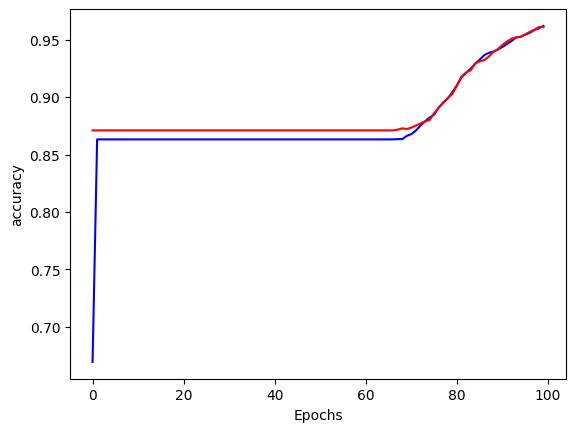

In [ ]:
# Visualization of the training process on the loss function
plt.plot(history.history["accuracy"], color="b")
plt.plot(history.history["val_accuracy"], color="r")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.show()